In [5]:
import pandas as pd
import numpy as np
import os
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import plotly.plotly as py
import dash
import dash_core_components as dcc
import dash_html_components as html
from  plotly.offline import plot
import plotly 
from IPython.display import SVG, display


# import subprocess
# subprocess.check_call(['pip', 'install', 'numpy']) # install pkg
# subprocess.check_call(['pip', 'install',"--upgrade", 'numpy']) # upgrade pkg

In [2]:
path = 'Main bank/'

files = []
filesNoAdd = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.CSV' in file:
            files.append(os.path.join(r, file))
            filesNoAdd.append(file)

for f in filesNoAdd:
    print(f)


04-05-2019.CSV
06-04-2019.CSV
09-03-2019.CSV
13-04-2019.CSV
16-03-2019.CSV
20-04-2019.CSV
23-02-2019.CSV
23-03-2019.CSV
27-04-2019.CSV
30-03-2019.CSV
23-02-2019.CSV
06-04-2019.CSV
09-03-2019.CSV
16-03-2019.CSV
23-03-2019.CSV
30-03-2019.CSV
13-04-2019.CSV
20-04-2019.CSV
27-04-2019.CSV
28-04-2019.CSV
05-05-2019.CSV
11-05-2019.CSV
18-05-2019.CSV


In [3]:
f1 = '04-05-2019'
f = ('Main bank/' + f1 + '.CSV')
rawData = pd.read_csv(f , encoding='latin1')
# rawData

In [4]:
sku = rawData.values[:189,0]


upc = rawData.values[:189,1]

Catalogue = rawData.values[:189,2]

title = rawData.values[:189,3]

label = rawData.values[:189,4]

Cost_Price = rawData.values[:189,5]

VSP = rawData.values[:189,6]


In [5]:
rawDatVal = []
rawDatVal = rawData.values[:189,7:149]
eachRaw = []
allRawvalue = []
BranchTotal = rawDatVal.sum(axis=0)

for i in range(len(rawDatVal[:,0])):
    for j in range(int((len(rawDatVal[0,:]))/3)):
        
        k=3 * j 

        eachRaw.append(rawDatVal[i,k])
    eachRaw = np.array(eachRaw)
    allRawvalue.append(eachRaw.sum())
    eachRaw = []



# rawData['Sum of sale for each goods'] = allRawvalue

In [6]:

eachRaw = []

BranchTotal = rawDatVal.sum(axis=0)
for j in range(int(len(rawDatVal[0,:])/3)):
    k=3 * j 
    sum = 0
    for i in range(len(rawDatVal[:,0])):
        sum += rawDatVal[i,k]
    rawData.iloc[i+1,k] = sum
    

    eachRaw = []
# allRawvalue.append(np.array(allRawvalue).sum())
# allRawvalue.append(np.array(allRawvalue).sum())



In [7]:
Virgin_Stock = []
Virgin_Stock = pd.DataFrame(Virgin_Stock)
Virgin_Stock['sku'] = sku
Virgin_Stock['upc'] = upc
Virgin_Stock['Catalogue'] = Catalogue
Virgin_Stock['title'] = title
Virgin_Stock['label'] = label
Virgin_Stock['VMS Cost'] = Cost_Price
Virgin_Stock['VSP'] = VSP


Virgin_Stock[f1] = list(allRawvalue)


In [8]:
i = 1
buf = np.zeros(len(Virgin_Stock.values[:,1]), dtype=int)



## i
for j in range(i):
    buf += np.array(Virgin_Stock.values[:,7+j], dtype = int)

Virgin_Stock["TOTAL"] = buf
ii = np.full(len(Virgin_Stock.values[:,1]) ,i )

Virgin_Stock["AVG. WEEK"] = np.divide(Virgin_Stock["TOTAL"] , ii)
Virgin_Stock['total VMS Cost'] = Virgin_Stock["TOTAL"] * Virgin_Stock['VMS Cost']
Virgin_Stock['total V.S.P.'] = Virgin_Stock["TOTAL"] * Virgin_Stock['VSP']
count = 0
for head in list(rawData.head(0)):
    if ".Sales Quantity" in head:
        Virgin_Stock[head] = rawData[head]
        try:
            headNum = int(head.replace(".Sales Quantity",''))
        except:
            print(int(headNum)," can't be cast to int")
        headNum = str(headNum)
        Virgin_Stock['TOTAL' + headNum] = rawData.values[:189, count]
        Virgin_Stock['VMS Cost' + headNum] = Virgin_Stock['VMS Cost'] * Virgin_Stock['TOTAL' + headNum]
        Virgin_Stock['V.S.P.' + headNum] = Virgin_Stock['VSP'] * Virgin_Stock['TOTAL' + headNum]
        Virgin_Stock['AVG. WEEK' + headNum] = np.divide(Virgin_Stock['TOTAL' + headNum] , ii)
    count +=1
        


In [9]:
Virgin_Stock.to_csv('Virgin_Stock.csv', index =False)

In [10]:
#  Virgin_Stock['VMS Cost'] * Virgin_Stock['TOTAL' + headNum]

In [11]:
path = '4Th Month/'

files = []
filesNoAdd = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))
            filesNoAdd.append(file)

for f in filesNoAdd:
    print(f)


05-01-2019.csv
12-01-2019.csv
19-01-2019.csv
26-01-2019.csv


In [2]:
numListOfBranch = ['401','402','404','405','412','416','417','423',
                   '424','425','426','429','444','490',]
listOfBranch = ['401', '401.VMS cost', '401.V.S.P.', '401.AVG. WEEK',
                '402', '402.VMS cost', '402.V.S.P.', '402.AVG. WEEK',
                '404', '404.VMS cost', '404.V.S.P.', '404.AVG. WEEK',
                '405', '405.VMS cost', '405.V.S.P.', '405.AVG. WEEK',
                '412', '412.VMS cost', '412.V.S.P.', '412.AVG. WEEK',
                '416', '416.VMS cost', '416.V.S.P.', '416.AVG. WEEK',
                '417', '417.VMS cost', '417.V.S.P.', '417.AVG. WEEK',
                '423', '423.VMS cost', '423.V.S.P.', '423.AVG. WEEK',
                '424', '424.VMS cost', '424.V.S.P.', '424.AVG. WEEK',
                '425', '425.VMS cost', '425.V.S.P.', '425.AVG. WEEK',
                '426', '426.VMS cost', '426.V.S.P.', '426.AVG. WEEK',
                '429', '429.VMS cost', '429.V.S.P.', '429.AVG. WEEK',
                '444', '444.VMS cost', '444.V.S.P.', '444.AVG. WEEK',
                '490', '490.VMS cost', '490.V.S.P.', '490.AVG. WEEK']

productDetail = ['Sku', 'UPC', 'Catalogue N', 'Title', 'Label' ,'Cost Price' ,'V.S.P.']
header = productDetail.copy()
header.extend(listOfBranch.copy())


In [13]:
def findID(sku, Data):
    numb = 0
    for SKUref in Data['Sku']:
        if sku == SKUref:
            return numb
        numb += 1
    return "This good with Sku of " + sku + "is not in data." 

In [14]:
def buildList(num, ide, productDetail, listOfBranch, rawData):
    
    producList = []
    for det in productDetail:
        producList.append(rawData[det][ide])
    for branch in listOfBranch:
        head = str(branch + '.Sales Quantity')
        if head in rawData.head(0):
            try:
                producList.append(float(rawData[head][ide]))
                producList.append(float(rawData[head][ide]) * float(rawData['V.S.P.'][ide]))
                producList.append(float(rawData[head][ide]) * float(rawData['Cost Price'][ide]))
                producList.append(float(rawData[head][ide]) / float(num))
                
            except:
                print("A number in raw data is string")
                
    return producList

In [15]:
def listAddition(Dataide, ide, num, productDetail, listOfBranch, rawData, monthRawData):
    colid = 0
    for branch in listOfBranch:
        head = str(branch + '.Sales Quantity')
        if head in rawData.head(0):
            monthRawData.iloc[Dataide, colid+7] = monthRawData.iloc[Dataide, colid+7] + rawData[head][ide]
            monthRawData.iloc[Dataide, colid+8] = monthRawData.iloc[Dataide, colid+7] * float(rawData['V.S.P.'][ide])
            monthRawData.iloc[Dataide, colid+9] = monthRawData.iloc[Dataide, colid+7] * float(rawData['Cost Price'][ide])
            monthRawData.iloc[Dataide, colid+10]= monthRawData.iloc[Dataide, colid+7] / float(num)
        colid += 1
    return monthRawData

In [16]:
def noStock(sku,rawData):
    sku = str(sku)
    i = findID(sku, rawData)
    if np.sum(rawData.values[i,7:]) > 0:
        return False
    else:
        return True


In [98]:
# a = np.zeros(shape=(1,len(header)))
monthRawData = pd.DataFrame(columns = list(header))

fcount = len(files)
b = []
for f in files:
#     f1 = (path + f)
    f1 = (f)
    rawData = pd.read_csv(f1 , encoding='latin1')

    
    sid =0
    b = 0
    for sku in rawData['Sku']:
        if sku not in list(monthRawData['Sku']):
            df = pd.DataFrame([list(buildList(fcount, sid, productDetail, listOfBranch, rawData))],
                              columns= list(header))
            monthRawData = monthRawData.append(df)
            
        else:
            Dataide = findID(sku, monthRawData)
            b = listAddition(Dataide, sid, fcount, productDetail, listOfBranch, rawData, monthRawData)
        sid +=1



In [99]:
totalGoodSale = []
count = 0
for sku in monthRawData['Sku']:
    saleOfGood = []
    for numB in numListOfBranch:
        saleOfGood.append(monthRawData.iloc[count][numB])
    totalGoodSale.append(np.sum(saleOfGood))
    count += 1
monthRawData["total sale of Goods"] = totalGoodSale
status = []
for tot in totalGoodSale:
#     if tot == 0:
    if tot <= 0:
        status.append('Not moving')
    if (tot > 0) and (tot <=2):
        status.append('Slow moving')
    if tot > 2:
        status.append('Fast moving')
#

rawData = pd.read_csv(files[0])

for i in range(len(status)):
    if noStock(monthRawData.iloc[i]['Sku'],rawData):
        status[i] = 'Run out of stock'
#
monthRawData["Status"] = status



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
b.to_csv("hg.csv", index=False)

In [39]:

df = pd.read_csv('hg.csv')


def generate_table(dataframe, max_rows=10):
    return html.Table(
        # Header
        [html.Tr([html.Th(col) for col in dataframe.columns])] +

        # Body
        [html.Tr([
            html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
        ]) for i in range(min(len(dataframe), max_rows))]
    )


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div(children=[
    html.H4(children='US Agriculture Exports (2011)'),
    generate_table(df)
])

if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Debugger PIN: 534-604-585
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

c:\program files\python36\lib\site-packages\IPython\core\interactiveshell.py:3304: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [18]:

df = pd.read_csv("hg.csv")
df = df[['Sku','Catalogue N','Cost Price','V.S.P.','Status']]

table = ff.create_table(df)
# print(table)
# table
plot(table)
pio.write_image(table, 'images/table.webp')
pio.write_image(table, 'images/table.pdf')


NameError: name 'ff' is not defined

In [23]:

plotly.tools.set_config_file(world_readable=False,
                             sharing='private')

In [10]:
init_notebook_mode(connected=True)
data = pd.read_csv('hg.csv')

branchTot = []
for col in numListOfBranch:
    branchTot.append(data[col].sum())
N = 100
x = numListOfBranch
y = branchTot
colors = np.random.rand(N)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x=x,
                y=y,
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

In [40]:

data = pd.read_csv('hg.csv')

branchTot = []
for col in numListOfBranch:
    branchTot.append(data[col].sum())
    
data = [go.Bar(x=numListOfBranch,
            y=branchTot)]

plot(data, filename='jupyter-basic_bar')

c:\program files\python36\lib\site-packages\plotly\offline\offline.py:524: UserWarning:

Your filename `jupyter-basic_bar` didn't end with .html. Adding .html to the end of your file.



'jupyter-basic_bar.html'

In [ ]:

data = pd.read_csv('hg.csv')

branchTot = []
for col in numListOfBranch:
    branchTot.append(data[col].sum())

x = numListOfBranch
y = branchTot
colors = np.random.rand(N)
  
data = go.Figure()
data.add_bar(x=x,
                y=y,
                marker={
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       })
pio.write_image(data, 'fig1.jpeg')
img_bytes = pio.to_image(data, format='svg')

display(SVG(img_bytes))

In [8]:
pio.orca.status


orca status
-----------
    state: unvalidated
    executable: None
    version: None
    port: None
    pid: None
    command: None


In [31]:
%%time
pio.write_image(data, 'fig1.jpeg')
img_bytes = pio.to_image(fig, format='svg')

display(SVG(img_bytes))

ValueError: 
The fig parameter must be a dict or Figure.
    Received value of type <class 'list'>: [{'x': ['401', '402', '404', '405', '412', '416', '417', '423', '424', '425', '426', '429', '444', '490'], 'y': [42.0, 10.0, 21.0, 91.0, 48.0, 388.0, 34.0, 14.0, 104.0, 7.0, 23.0, 21.0, 1.0, 12.0]}]

In [28]:
pio.orca.shutdown_server()
pio.orca.status

orca status
-----------
    state: validated
    executable: C:\ProgramData\Miniconda3\orca.CMD
    version: 1.2.1
    port: None
    pid: None
    command: None


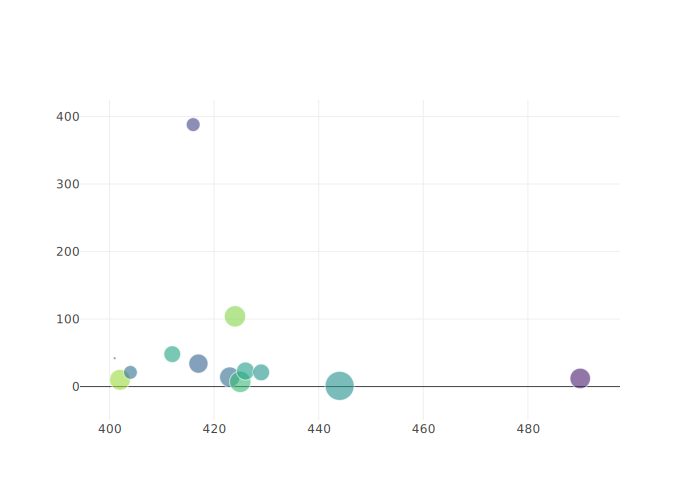